In [5]:
import pandas as pd
file_path = '202412_CochesRaw_sample.csv'
df = pd.read_csv(file_path, sep=';', decimal='.', encoding='utf-8')
print(df.head())

  Pais      Marca  Modelo   Precio Kilometros Automatico/Manual Fabricacion  \
0    D      mazda    cx-5  32980.0      13809        Automatico      jun-24   
1    B       ford  fiesta  18980.0         10            Manual      oct-22   
2    D    hyundai     i20  22410.0          5        Automatico      sep-24   
3    D  chevrolet  camaro  39999.0      31000        Automatico      ago-20   
4    D       ford    kuga  24480.0      32000        Automatico      ene-21   

  Combustible         Potencia  
0    Gasolina  121 kW (165 CV)  
1    Gasolina   74 kW (101 CV)  
2    Gasolina   74 kW (101 CV)  
3    Gasolina  339 kW (461 CV)  
4      Diesel   88 kW (120 CV)  


In [6]:
df.head().to_csv('202412_CochesRaw_sample_head.csv', sep=';', decimal='.', encoding='utf-8', index=False)

In [7]:
df.dropna(subset=['Kilometros'], inplace=True)

print("\nValores faltantes por columna:")

print(df.isnull().sum())

print(df.shape)


Valores faltantes por columna:
Pais                   0
Marca                  0
Modelo               100
Precio               660
Kilometros             0
Automatico/Manual      0
Fabricacion            0
Combustible            0
Potencia               0
dtype: int64
(9795, 9)


In [8]:
# Información general del dataset
print("\\nInformación del dataset:")
print(df.info())

\nInformación del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 9795 entries, 0 to 10298
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pais               9795 non-null   object 
 1   Marca              9795 non-null   object 
 2   Modelo             9695 non-null   object 
 3   Precio             9135 non-null   float64
 4   Kilometros         9795 non-null   object 
 5   Automatico/Manual  9795 non-null   object 
 6   Fabricacion        9795 non-null   object 
 7   Combustible        9795 non-null   object 
 8   Potencia           9795 non-null   object 
dtypes: float64(1), object(8)
memory usage: 765.2+ KB
None


In [9]:
# Dimensiones del dataset
print("\\nDimensiones del dataset (filas, columnas):")
print(df.shape)

\nDimensiones del dataset (filas, columnas):
(9795, 9)


In [10]:
# Mostrar los tipos de cada columna
print("Tipos de columnas:")
print(df.dtypes)

Tipos de columnas:
Pais                  object
Marca                 object
Modelo                object
Precio               float64
Kilometros            object
Automatico/Manual     object
Fabricacion           object
Combustible           object
Potencia              object
dtype: object


In [11]:
# Resumen de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
Pais                   0
Marca                  0
Modelo               100
Precio               660
Kilometros             0
Automatico/Manual      0
Fabricacion            0
Combustible            0
Potencia               0
dtype: int64


In [12]:
# Eliminar filas con valores faltantes en la columna "Kilometros"
df.dropna(subset=['Kilometros'], inplace=True)
# Rellenar valores faltantes en la columna "Precio" con la media
df['Precio'] = df['Precio'].fillna(df['Precio'].mean())
# Rellenar valores faltantes en la columna "Modelo" con la moda
df['Modelo'] = df['Modelo'].fillna(df['Modelo'].mode()[0])

In [13]:
# Identificar filas duplicadas
print("Número de filas duplicadas:")
print(df.duplicated().sum())

Número de filas duplicadas:
285


In [14]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [15]:
# Convertir la columna 'Kilometros' de string a float
df['Kilometros'] = df['Kilometros'].str.replace('.', '', regex=False)  # Eliminar separadores de miles
df['Kilometros'] = pd.to_numeric(df['Kilometros'], errors='coerce')

In [16]:
print(df.columns)

Index(['Pais', 'Marca', 'Modelo', 'Precio', 'Kilometros', 'Automatico/Manual',
       'Fabricacion', 'Combustible', 'Potencia'],
      dtype='object')


In [17]:
# Convertir la columna 'Fabricacion' a formato de fecha
# El formato original es 'mmm-yy' codificado en español (por ejemplo, 'abr-19')
df['Fabricacion'] = pd.to_datetime(df['Fabricacion'], format='%b-%y', errors='coerce')

In [18]:
# Extraer valores de 'Potencia' para crear columnas 'kW' y 'CV'
df['kW'] = df['Potencia'].str.extract(r'(\\d+) kW')[0].astype(float)
df['CV'] = df['Potencia'].str.extract(r'\\((\\d+) CV\\)')[0].astype(float)
print(df[['Potencia', 'kW', 'CV']].head())


          Potencia  kW  CV
0  121 kW (165 CV) NaN NaN
1   74 kW (101 CV) NaN NaN
2   74 kW (101 CV) NaN NaN
3  339 kW (461 CV) NaN NaN
4   88 kW (120 CV) NaN NaN


In [19]:
# Resumen de estadísticas descriptivas
print("\\nEstadísticas descriptivas del dataset:")
print(df.describe())

\nEstadísticas descriptivas del dataset:
             Precio    Kilometros                    Fabricacion   kW   CV
count  9.510000e+03  9.310000e+03                           6150  0.0  0.0
mean   3.826351e+04  9.780758e+04  2015-11-20 15:51:48.292683008  NaN  NaN
min    3.000000e+02  0.000000e+00            1969-02-01 00:00:00  NaN  NaN
25%    9.400000e+03  2.680625e+04            2011-10-01 00:00:00  NaN  NaN
50%    1.816950e+04  8.179600e+04            2017-11-01 00:00:00  NaN  NaN
75%    3.350000e+04  1.484988e+05            2021-09-01 00:00:00  NaN  NaN
max    1.000000e+08  4.228000e+06            2068-07-01 00:00:00  NaN  NaN
std    1.026251e+06  9.529870e+04                            NaN  NaN  NaN


In [20]:
# Calcular los límites para eliminar valores atípicos en 'Precio'
q1 = df['Precio'].quantile(0.25)  # Primer cuartil
q3 = df['Precio'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1  # Rango intercuartil
lower_bound = q1 - 1.5 * iqr  # Límite inferior
upper_bound = q3 + 1.5 * iqr  # Límite superior

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
filtered_df = df[(df['Precio'] >= lower_bound) & (df['Precio'] <= upper_bound)]

# Actualizar el DataFrame original
df = filtered_df
print("Valores atípicos eliminados de la columna 'Precio'.")

Valores atípicos eliminados de la columna 'Precio'.


In [21]:
import matplotlib.pyplot as plt

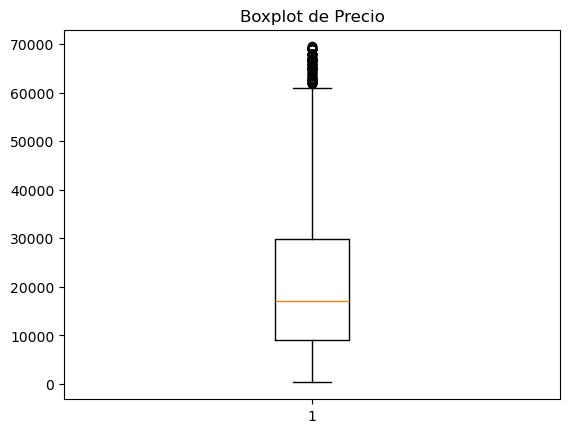

In [23]:
# Visualización de valores atípicos con boxplot
plt.boxplot(df['Precio'].dropna())
plt.title('Boxplot de Precio')
plt.show()

In [25]:
# Calcular los límites para eliminar valores atípicos en 'Precio'
q1 = df['Precio'].quantile(0.25)  # Primer cuartil
q3 = df['Precio'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1  # Rango intercuartil
lower_bound = q1 - 1.5 * iqr  # Límite inferior
upper_bound = q3 + 1.5 * iqr  # Límite superior

In [27]:
# Filtrar el DataFrame para mantener solo los valores dentro de los límites
filtered_df = df[(df['Precio'] >= lower_bound) & (df['Precio'] <= upper_bound)]

In [29]:
# Actualizar el DataFrame original
df = filtered_df
print("Valores atípicos eliminados de la columna 'Precio'.")

Valores atípicos eliminados de la columna 'Precio'.


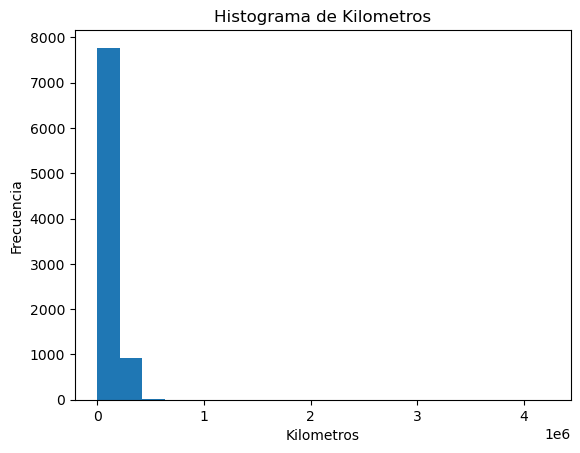

In [35]:
# Histograma para explorar la distribución
plt.hist(df['Kilometros'].dropna(), bins=20)
plt.title('Histograma de Kilometros')
plt.xlabel('Kilometros')
plt.ylabel('Frecuencia')
plt.show()

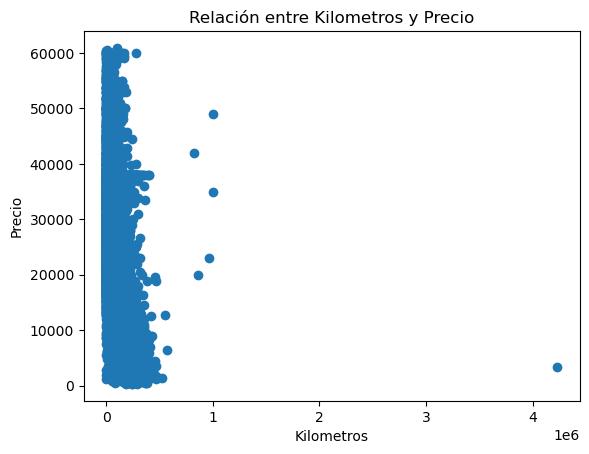

In [37]:
# Relación entre Kilometros y Precio
plt.scatter(df['Kilometros'], df['Precio'])
plt.title('Relación entre Kilometros y Precio')
plt.xlabel('Kilometros')
plt.ylabel('Precio')
plt.show()